In [14]:
import pandas as pd
from scipy import stats
from pyranges import PyRanges
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
header_1 = ['Chromosome','Start', 'End', 'Original','Strain']
header_2 = ['Chromosome', 'Start' , 'End']
header_3 = ['Chromosome', 'Start' , 'End', 'Type']
header_4 = ['Chromosome','Start', 'End', 'Type','Strain']

grch37_to_t2t = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
#grch37_to_t2t = PyRanges(grch37_to_t2t)
''
grch37_to_t2t_types = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_grch37_to_t2tchm13_types.bed', sep='\t', names=header_4)

grch37_to_t2t_all = pd.read_csv('/Users/luciabazan/Downloads/liftover_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
grch37_to_t2t_all = PyRanges(grch37_to_t2t_all)

t2t_to_grch37 = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_t2tchm13_to_grch37.bed', sep='\t', names=header_1)
t2t_to_grch37 = PyRanges(t2t_to_grch37)

grch37 = pd.read_csv('vst_coordinates_grch37.bed', sep=',', names=header_3)
grch37 = PyRanges(grch37)

t2t = pd.read_csv('vst_cnvrs_coordinates_chm13t2t.bed', sep='\t', names=header_3)
t2t = PyRanges(t2t)

t2t_all= pd.read_csv('../data/vst_cnvr_results_t2tchm13.csv')
t2t_all = PyRanges(t2t_all)
#t2t_all

t2t_all_values= pd.read_csv('vst_cnvr_candidates_chm13t2t.csv')
t2t_all_values = PyRanges(t2t_all_values)


grch37_all_values= pd.read_csv('vst_candidates_grch37.csv')
#grch37_all_values = PyRanges(grch37_all_values)

grch37_all_values_all_cnvs = pd.read_csv('../data/vst_results_grch37.csv')
grch37_all_values_all_cnvs

,Chromosome,Start,End,Type,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,176101,176101,deletion,0.00113,0.00296,0.01980,0.04847,0.00462,0.00031,...,0.03052,0.05891,0.01228,0.00365,0.01144,0.00441,0.01162,0.02469,0.03157,0.00185
1,chr1,449901,449901,deletion,0.00000,0.00000,0.01075,0.02736,0.02786,0.00508,...,0.00815,0.02250,0.02163,0.00365,0.00322,0.00636,0.00098,0.00048,0.00733,0.01248
2,chr1,665601,665601,deletion,0.00047,0.04104,0.00301,0.00687,0.00005,0.00067,...,0.06225,0.10623,0.05403,0.04467,0.00078,0.00252,0.00092,0.00684,0.00302,0.00038
3,chr1,665601,665601,duplication,-0.00000,0.01779,0.00002,0.00008,0.02189,0.02900,...,0.01653,0.02250,0.00000,0.00000,0.00002,0.02043,0.02727,0.02621,0.03179,0.00000
4,chr1,891701,891701,deletion,0.00164,0.00012,0.00004,0.00077,0.03324,0.00084,...,0.00029,0.00030,0.04514,0.00140,0.00111,0.03102,0.00054,0.05328,0.00276,0.01934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,chr9,140136301,140136301,deletion,0.01402,0.00007,0.02165,0.00041,0.03190,0.00900,...,0.01586,0.00014,0.02431,0.00589,0.01292,0.00091,0.00216,0.02050,0.00433,0.00571
7836,chr9,140197201,140197201,deletion,0.00769,0.00877,0.00001,0.00814,0.01081,0.01437,...,0.00815,0.00000,0.00000,0.00000,0.00756,0.01009,0.01352,0.00000,0.00000,0.00000
7837,chr9,140245301,140245301,deletion,0.15589,0.12055,0.28916,0.16862,0.20593,0.17624,...,0.05315,0.01008,0.01293,0.00205,0.01708,0.01357,0.02560,0.00013,0.00197,0.00365
7838,chr9,140387601,140387601,deletion,0.00062,0.02499,0.03329,0.02323,0.03069,0.01955,...,0.00000,0.00000,0.00000,0.00737,0.00000,0.00000,0.01054,0.00000,0.00676,0.00950


In [16]:
#### GRCh37 vst to T2T vst 
grch37_to_t2t = grch37_to_t2t.merge(grch37_to_t2t_types, on=['Chromosome','Start','End'])
grch37_to_t2t = PyRanges(grch37_to_t2t)
grch37_to_t2t 

,Chromosome,Start,End,Original,Strain_x,Type,Strain_y
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1
...,...,...,...,...,...,...,...
453,chr22,37184554,37184554,chr22:37119802-37119801,1,deletion,1
454,chr22,39367662,39367662,chr22:39293302-39293301,1,deletion,1
455,chr22,45005436,45005436,chr22:44917502-44917501,1,deletion,1
456,chr22,45643209,45643209,chr22:45554602-45554601,1,deletion,1


In [17]:
#t2t.overlap(grch37_to_t2t)
grch37_to_t2tchm13 = grch37_to_t2t.nearest(t2t_all_values)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()

grch37_to_t2tchm13 = grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 2000]
grch37_to_t2tchm13

,Chromosome,Start,End,Original,Strain_x,Type,Strain_y,Start_b,End_b,Africa-America,...,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance
0,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9285874,9351410,0.23644,...,0.18713,0.05719,0.14793,0.01534,0.00937,0.00508,0.04876,0.00374,0.02938,0
1,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61533762,0.32092,...,0.00440,0.18542,0.06628,0.01717,0.03727,0.00398,0.12549,0.03446,0.01565,0
2,chr1,62067167,62067167,chr1:62654202-62654201,1,deletion,1,62042086,62085609,0.16133,...,0.01483,0.26664,0.29168,0.00462,0.11413,0.19075,0.12578,0.17145,0.01995,0
3,chr1,93665860,93665860,chr1:94285702-94285701,1,deletion,1,93661116,93671835,0.11423,...,0.00379,0.00831,0.02420,0.02913,0.04484,0.07731,0.00066,0.00878,0.00662,0
4,chr1,156340662,156340662,chr1:157173602-157173601,1,deletion,1,156324576,156343901,0.07229,...,0.42200,0.41269,0.30672,0.11283,0.10840,0.05292,0.00187,0.01845,0.01281,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,chr17,10894560,10894560,chr17:10889602-10889601,1,deletion,1,10892408,10905466,0.00110,...,0.00812,0.04673,0.32743,0.00642,0.03875,0.25943,0.08559,0.36245,0.20581,0
387,chr17,61202781,61202781,chr17:58411202-58411201,1,deletion,1,61184942,61222837,0.06683,...,0.07222,0.05650,0.12527,0.00017,0.00015,0.01997,0.00067,0.01392,0.02299,0
393,chr17,35492925,35492925,chr17:32872902-32872901,1,deletion,1,35492933,35500679,0.43513,...,0.04207,0.00067,0.00025,0.02714,0.00191,0.00124,0.05135,0.03528,0.00006,9
400,chr18,40874737,40874737,chr18:38259802-38259801,1,deletion,1,40856121,40883326,0.04220,...,0.11735,0.08149,0.01141,0.06605,0.04394,0.00130,0.00464,0.04264,0.02783,0


In [18]:
## Getting vst values 
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)

grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'] -1 
grch37_to_t2tchm13
#grch37_to_t2tchm13.astype({'Start_old': 'int64'}).dtypes

,Chromosome,Start,End,Original,Strain_x,Type,Strain_y,Start_b,End_b,Africa-America,...,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance,Chromosome_old,coordinates_old,Start_old,End_old
0,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9285874,9351410,0.23644,...,0.00937,0.00508,0.04876,0.00374,0.02938,0,chr1,9846202-9846201,9846201,9846201
1,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61533762,0.32092,...,0.03727,0.00398,0.12549,0.03446,0.01565,0,chr1,62113302-62113301,62113301,62113301
2,chr1,62067167,62067167,chr1:62654202-62654201,1,deletion,1,62042086,62085609,0.16133,...,0.11413,0.19075,0.12578,0.17145,0.01995,0,chr1,62654202-62654201,62654201,62654201
3,chr1,93665860,93665860,chr1:94285702-94285701,1,deletion,1,93661116,93671835,0.11423,...,0.04484,0.07731,0.00066,0.00878,0.00662,0,chr1,94285702-94285701,94285701,94285701
4,chr1,156340662,156340662,chr1:157173602-157173601,1,deletion,1,156324576,156343901,0.07229,...,0.10840,0.05292,0.00187,0.01845,0.01281,0,chr1,157173602-157173601,157173601,157173601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,chr17,10894560,10894560,chr17:10889602-10889601,1,deletion,1,10892408,10905466,0.00110,...,0.03875,0.25943,0.08559,0.36245,0.20581,0,chr17,10889602-10889601,10889601,10889601
387,chr17,61202781,61202781,chr17:58411202-58411201,1,deletion,1,61184942,61222837,0.06683,...,0.00015,0.01997,0.00067,0.01392,0.02299,0,chr17,58411202-58411201,58411201,58411201
393,chr17,35492925,35492925,chr17:32872902-32872901,1,deletion,1,35492933,35500679,0.43513,...,0.00191,0.00124,0.05135,0.03528,0.00006,9,chr17,32872902-32872901,32872901,32872901
400,chr18,40874737,40874737,chr18:38259802-38259801,1,deletion,1,40856121,40883326,0.04220,...,0.04394,0.00130,0.00464,0.04264,0.02783,0,chr18,38259802-38259801,38259801,38259801


In [19]:
vst_grch37 = grch37_to_t2tchm13.merge(grch37_all_values, left_on=['Start_old','End_old'], right_on=['Start','End'])
vst_grch37 = vst_grch37.drop_duplicates()
vst_grch37

,Chromosome_x,Start_x,End_x,Original,Strain_x,Type_x,Strain_y,Start_b,End_b,Africa-America_x,...,CentralAsiaSiberia-EastAsia_y,CentralAsiaSiberia-Oceania_y,CentralAsiaSiberia-SouthAsia_y,CentralAsiaSiberia-WestEurasia_y,EastAsia-Oceania_y,EastAsia-SouthAsia_y,EastAsia-WestEurasia_y,Oceania-SouthAsia_y,Oceania-WestEurasia_y,SouthAsia-WestEurasia_y
0,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9285874,9351410,0.23644,...,0.00322,0.00473,0.02281,0.01140,0.01292,0.01026,0.02870,0.04041,0.00134,0.07167
1,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61533762,0.32092,...,0.03559,0.02488,0.18592,0.07596,0.00108,0.05781,0.01040,0.08144,0.01532,0.01813
2,chr1,62067167,62067167,chr1:62654202-62654201,1,deletion,1,62042086,62085609,0.16133,...,0.01047,0.01152,0.21087,0.31966,0.04052,0.12127,0.21908,0.30559,0.42130,0.01496
3,chr1,93665860,93665860,chr1:94285702-94285701,1,deletion,1,93661116,93671835,0.11423,...,0.00551,0.00658,0.01108,0.03255,0.02323,0.03356,0.07155,0.00068,0.01201,0.00934
4,chr1,156340662,156340662,chr1:157173602-157173601,1,deletion,1,156324576,156343901,0.07229,...,0.05580,0.38149,0.42545,0.30292,0.13571,0.18095,0.13059,0.00120,0.00197,0.00660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,chr17,10894560,10894560,chr17:10889602-10889601,1,deletion,1,10892408,10905466,0.00110,...,0.00003,0.00110,0.03571,0.33498,0.00136,0.03735,0.30263,0.02404,0.31180,0.16420
107,chr17,61202781,61202781,chr17:58411202-58411201,1,deletion,1,61184942,61222837,0.06683,...,0.00546,0.02183,0.00171,0.02187,0.00494,0.00112,0.00640,0.01058,0.00001,0.01261
108,chr17,35492925,35492925,chr17:32872902-32872901,1,deletion,1,35492933,35500679,0.43513,...,0.00355,0.09977,0.00053,0.00206,0.05657,0.00145,0.00011,0.07788,0.04834,0.00069
109,chr18,40874737,40874737,chr18:38259802-38259801,1,deletion,1,40856121,40883326,0.04220,...,0.00014,0.09603,0.07574,0.00307,0.07865,0.06951,0.00241,0.00123,0.04502,0.04175


In [20]:
## correlation
from itertools import combinations
regions = ['Africa', 'CentralAsiaSiberia', 'America','Oceania', 'WestEurasia', 'SouthAsia', 'EastAsia']
regions.sort()
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])

/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_14160/2136663405.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


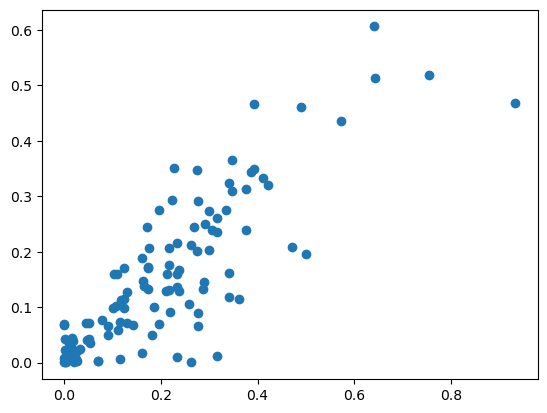

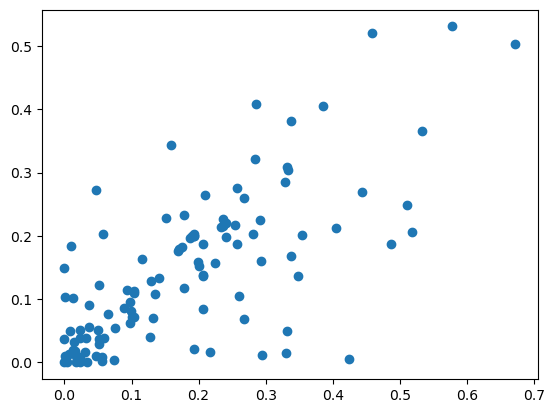

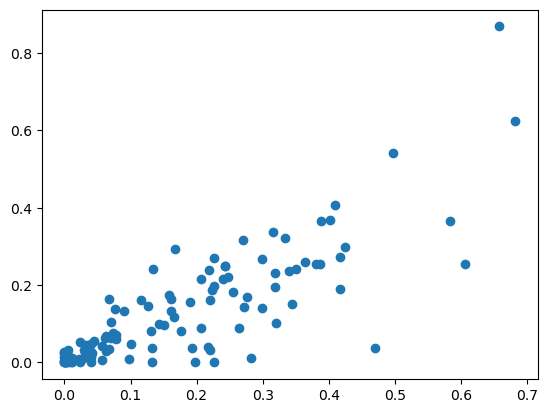

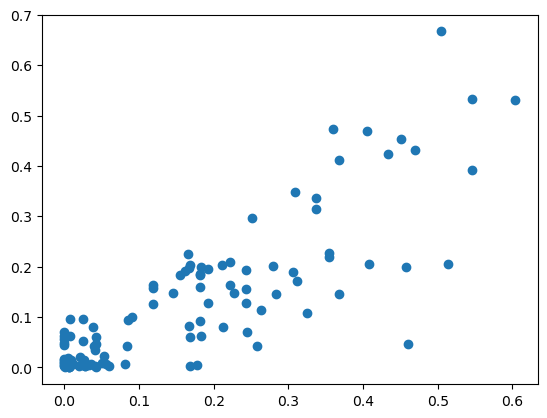

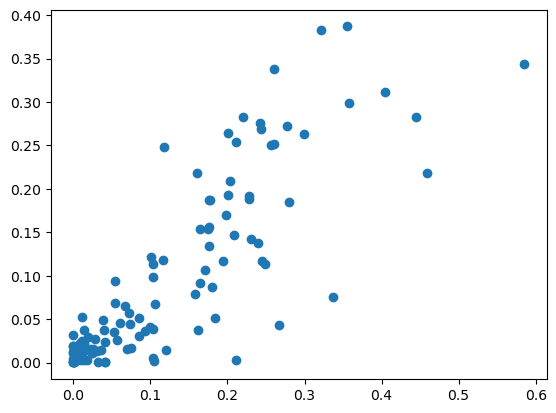

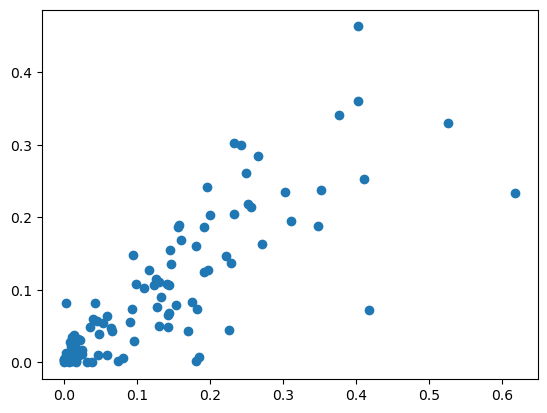

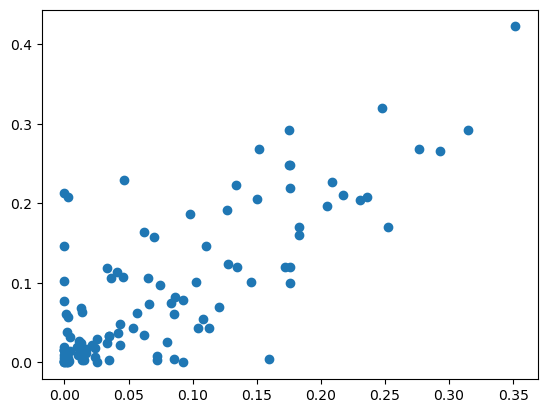

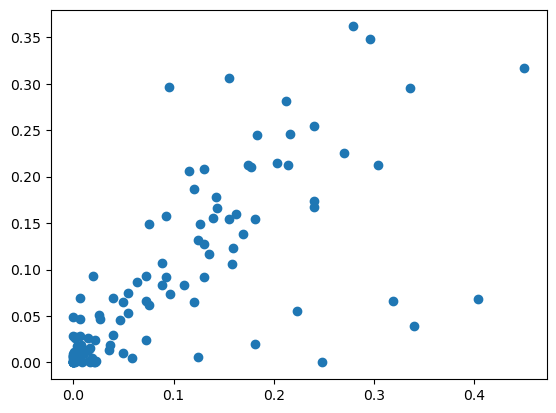

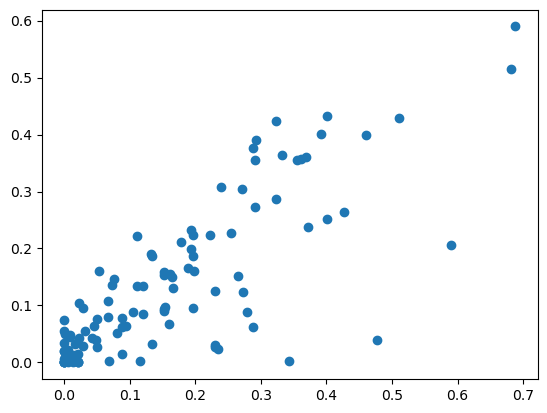

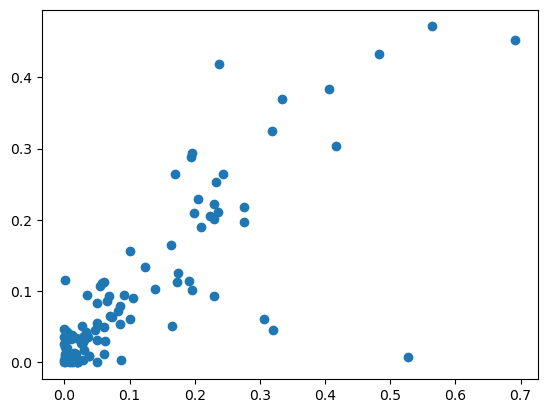

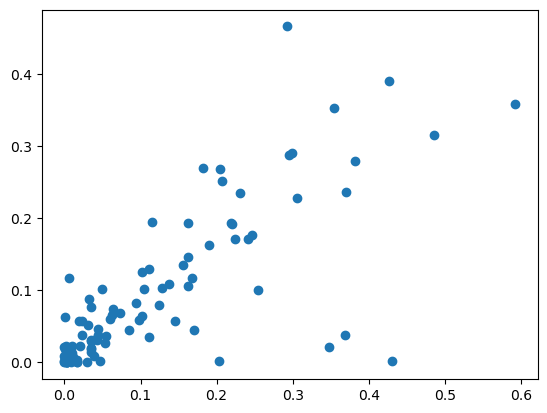

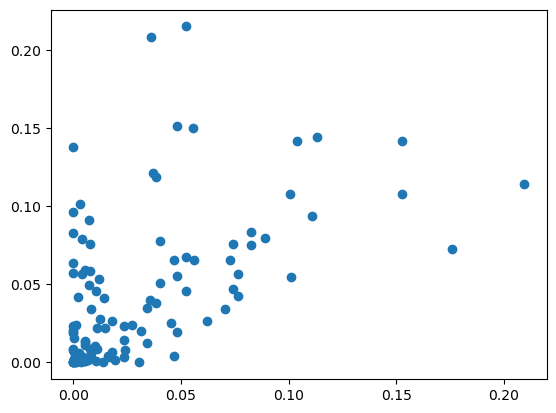

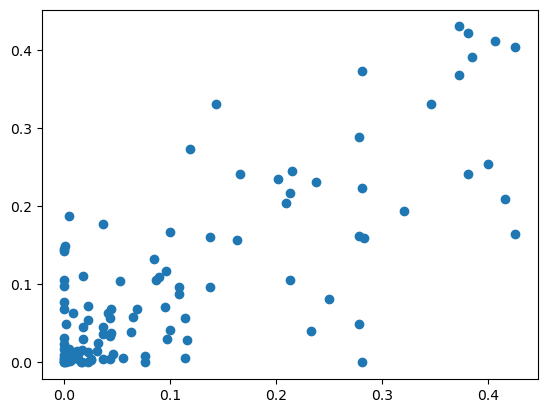

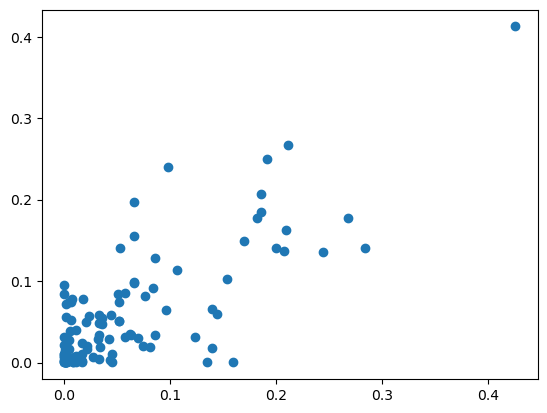

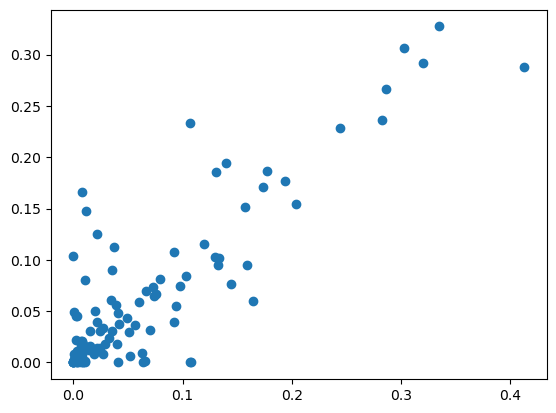

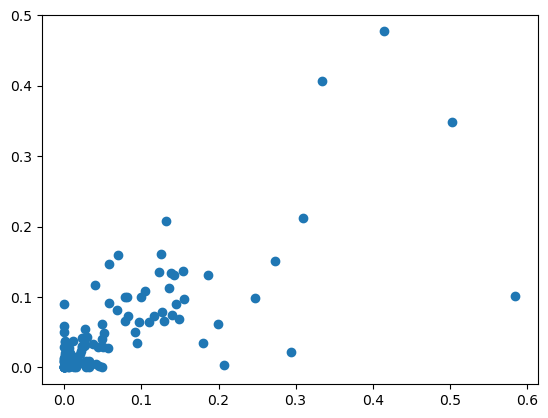

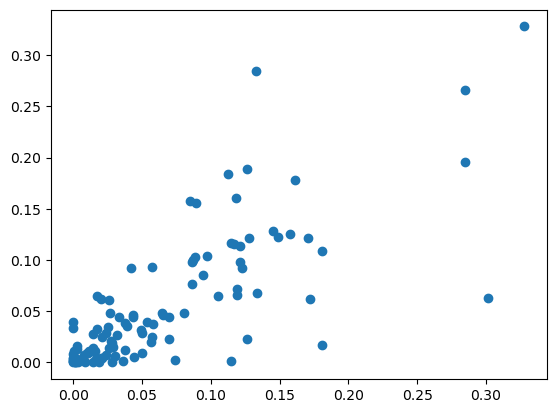

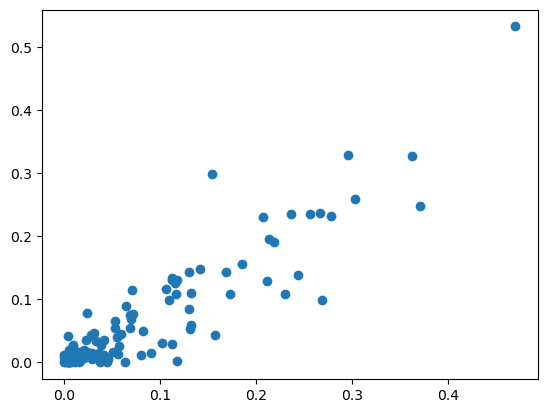

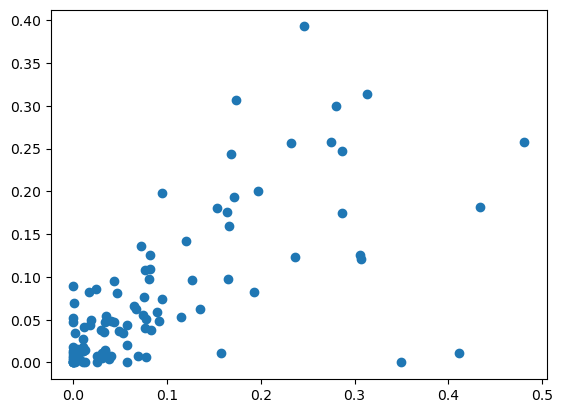

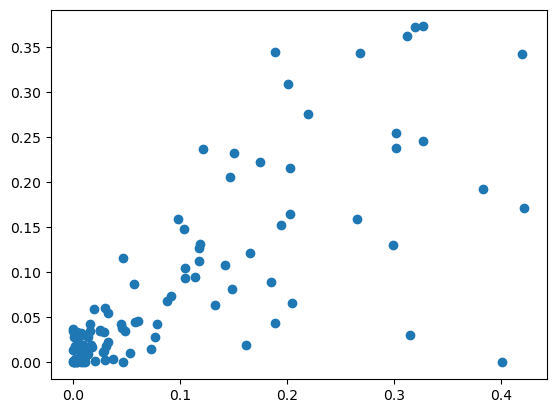

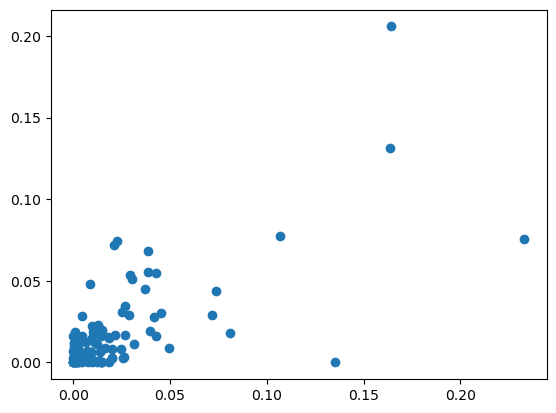

In [21]:
for i in range(21):
    plt.figure()
    plt.scatter(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] )

In [22]:
for i in range(21):
    print(combination_names[i])
    print(stats.spearmanr(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] ))
    

Africa-America
SignificanceResult(statistic=0.7945339843692886, pvalue=2.315040905723925e-25)
Africa-CentralAsiaSiberia
SignificanceResult(statistic=0.6691303589965583, pvalue=9.977917567682482e-16)
Africa-EastAsia
SignificanceResult(statistic=0.8138872137211246, pvalue=1.8482392670169354e-27)
Africa-Oceania
SignificanceResult(statistic=0.7829846616789589, pvalue=3.2532285539019022e-24)
Africa-SouthAsia
SignificanceResult(statistic=0.8364139792831026, pvalue=3.1168032510985136e-30)
Africa-WestEurasia
SignificanceResult(statistic=0.8358229256520955, pvalue=3.730389047671766e-30)
America-CentralAsiaSiberia
SignificanceResult(statistic=0.6773743902753774, pvalue=3.260797539809875e-16)
America-EastAsia
SignificanceResult(statistic=0.7834099844136064, pvalue=2.960036498607719e-24)
America-Oceania
SignificanceResult(statistic=0.7865182429202169, pvalue=1.4747211298055628e-24)
America-SouthAsia
SignificanceResult(statistic=0.7576111320344008, pvalue=6.370290753527692e-22)
America-WestEurasia


In [23]:
for i in range(21):
    print(combination_names[i])
    print(stats.pearsonr(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] ))
    

Africa-America
PearsonRResult(statistic=0.8329324661305593, pvalue=8.892218830933273e-30)
Africa-CentralAsiaSiberia
PearsonRResult(statistic=0.7050626869736292, pvalue=5.757692699814161e-18)
Africa-EastAsia
PearsonRResult(statistic=0.8186972591598292, pvalue=5.095463428990797e-28)
Africa-Oceania
PearsonRResult(statistic=0.8370620617925819, pvalue=2.5572697566367444e-30)
Africa-SouthAsia
PearsonRResult(statistic=0.8388815720141294, pvalue=1.4604680975001632e-30)
Africa-WestEurasia
PearsonRResult(statistic=0.8324702964296109, pvalue=1.0201475960895813e-29)
America-CentralAsiaSiberia
PearsonRResult(statistic=0.7887444138115833, pvalue=8.889508547187745e-25)
America-EastAsia
PearsonRResult(statistic=0.7257072605616086, pvalue=2.0673224205341923e-19)
America-Oceania
PearsonRResult(statistic=0.8087072578911604, pvalue=7.104480182441003e-27)
America-SouthAsia
PearsonRResult(statistic=0.8192761352997241, pvalue=4.352353356627091e-28)
America-WestEurasia
PearsonRResult(statistic=0.7864830611531

In [24]:
grch37_same_type_as_t2t = []
for index,row in vst_grch37.iterrows():
    if row[5] == row[9]:
        #print(row)
        grch37_same_type_as_t2t.append(row)

        
grch37_same_type_as_t2t = pd.DataFrame(grch37_same_type_as_t2t)
#grch37_same_type_as_t2t#.iloc[5,:]

In [25]:
vst_t2t_same_type_as_grch37 = []
for index,row in vst_t2t.iterrows():
    if row[5] == row[9]:
        #print(row)
        vst_t2t_same_type_as_grch37.append(row)
    #print(row[5], row[17])
    
vst_t2t_same_type_as_grch37 = pd.DataFrame(vst_t2t_same_type_as_grch37)
#vst_t2t_same_type_as_grch37#.iloc[-1,:]

NameError: name 'vst_t2t' is not defined

In [26]:
#### GRCh37 vst to T2T all cnvs 
#t2t.overlap(grch37_to_t2t)
grch37_to_t2tchm13 = grch37_to_t2t.nearest(t2t_all)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
#grch37_to_t2tchm13.sort_values(by='Distance').head(417)
grch37_to_t2tchm13[grch37_to_t2tchm13['Distance']<2000]

,Chromosome,Start,End,Original,Strain_x,Type,Strain_y,Start_b,End_b,Africa-America,...,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1,7828730,7845560,0.06454,...,0.10530,0.08078,0.10348,0.01355,0.02573,0.00542,0.00152,0.00113,0.00558,0
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9285874,9351410,0.01286,...,0.01098,0.00739,0.01369,0.00001,0.00032,0.00145,0.00020,0.00129,0.00285,0
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1,15243923,15317676,0.01333,...,0.07145,0.11879,0.09073,0.00099,0.00503,0.00867,0.01020,0.01077,0.00101,0
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1,23792853,23889404,0.01130,...,0.03330,0.01304,0.00337,0.00751,0.00025,0.00127,0.00569,0.01057,0.00241,0
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61533762,0.32092,...,0.00440,0.18542,0.06628,0.01717,0.03727,0.00398,0.12549,0.03446,0.01565,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,chr18,40874737,40874737,chr18:38259802-38259801,1,deletion,1,40856121,40883326,0.00001,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
403,chr18,46998195,46998195,chr18:44387502-44387501,1,duplication,1,46893620,47024991,0.00813,...,0.00000,0.00000,0.00792,0.00763,0.01030,0.00033,0.00000,0.00704,0.01000,0
404,chr18,54927078,54927078,chr18:52391202-52391201,1,deletion,1,54920591,54956719,0.00999,...,0.00119,0.00301,0.00127,0.00058,0.00001,0.00032,0.00045,0.00003,0.00021,0
405,chr18,66739381,66739381,chr18:64208602-64208601,1,deletion,1,66716038,66832385,0.07253,...,0.00056,0.00008,0.00004,0.02224,0.01741,0.01125,0.00020,0.00073,0.00024,0


In [27]:
## Getting vst values 
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)

grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'] -1 
grch37_to_t2tchm13
#grch37_to_t2tchm13.astype({'Start_old': 'int64'}).dtypes

,Chromosome,Start,End,Original,Strain_x,Type,Strain_y,Start_b,End_b,Africa-America,...,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance,Chromosome_old,coordinates_old,Start_old,End_old
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1,7828730,7845560,0.06454,...,0.02573,0.00542,0.00152,0.00113,0.00558,0,chr1,8360202-8360201,8360201,8360201
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9285874,9351410,0.01286,...,0.00032,0.00145,0.00020,0.00129,0.00285,0,chr1,9846202-9846201,9846201,9846201
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1,15243923,15317676,0.01333,...,0.00503,0.00867,0.01020,0.01077,0.00101,0,chr1,16150402-16150401,16150401,16150401
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1,23792853,23889404,0.01130,...,0.00025,0.00127,0.00569,0.01057,0.00241,0,chr1,24377602-24377601,24377601,24377601
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61533762,0.32092,...,0.03727,0.00398,0.12549,0.03446,0.01565,0,chr1,62113302-62113301,62113301,62113301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,chr18,67489787,67489787,chr18:64958902-64958901,1,deletion,1,67430123,67529626,0.02013,...,0.01030,0.01372,0.00000,0.00000,0.00000,0,chr18,64958902-64958901,64958901,64958901
407,chr18,12330671,12330671,chr18:12167502-12167501,1,deletion,1,12398027,12417292,0.00000,...,0.00000,0.00551,0.00000,0.00348,0.00496,67357,chr18,12167502-12167501,12167501,12167501
408,chr18,51869012,51869012,chr18:49192402-49192401,1,deletion,1,51865004,51866374,0.01654,...,0.00000,0.00000,0.00000,0.00000,0.00000,2639,chr18,49192402-49192401,49192401,49192401
409,chr18,56927534,56927534,chr18:54392802-54392801,1,deletion,1,56911323,56917200,0.00000,...,0.00000,0.01112,0.00000,0.00704,0.01000,10335,chr18,54392802-54392801,54392801,54392801


In [28]:
vst_grch37 = grch37_to_t2tchm13.merge(grch37_all_values, left_on=['Start_old','End_old'], right_on=['Start','End'])
vst_grch37 = vst_grch37.drop_duplicates()
vst_grch37

,Chromosome_x,Start_x,End_x,Original,Strain_x,Type_x,Strain_y,Start_b,End_b,Africa-America_x,...,CentralAsiaSiberia-EastAsia_y,CentralAsiaSiberia-Oceania_y,CentralAsiaSiberia-SouthAsia_y,CentralAsiaSiberia-WestEurasia_y,EastAsia-Oceania_y,EastAsia-SouthAsia_y,EastAsia-WestEurasia_y,Oceania-SouthAsia_y,Oceania-WestEurasia_y,SouthAsia-WestEurasia_y
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1,7828730,7845560,0.06454,...,0.20969,0.16537,0.19923,0.23576,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9285874,9351410,0.01286,...,0.00322,0.00473,0.02281,0.01140,0.01292,0.01026,0.02870,0.04041,0.00134,0.07167
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1,15243923,15317676,0.01333,...,0.00396,0.36782,0.18162,0.13144,0.28087,0.14513,0.12031,0.03382,0.03128,0.00041
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1,23792853,23889404,0.01130,...,0.06462,0.32327,0.00452,0.02047,0.09120,0.04025,0.01070,0.24554,0.13059,0.00854
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61533762,0.32092,...,0.03559,0.02488,0.18592,0.07596,0.00108,0.05781,0.01040,0.08144,0.01532,0.01813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,chr18,67489787,67489787,chr18:64958902-64958901,1,deletion,1,67430123,67529626,0.02013,...,0.03836,0.10802,0.00920,0.05801,0.01449,0.08627,0.19576,0.17308,0.29650,0.02247
417,chr18,12330671,12330671,chr18:12167502-12167501,1,deletion,1,12398027,12417292,0.00000,...,0.01653,0.20185,0.01065,0.00662,0.14338,0.00911,0.00485,0.20578,0.20169,0.00097
418,chr18,51869012,51869012,chr18:49192402-49192401,1,deletion,1,51865004,51866374,0.01654,...,0.01363,0.16925,0.19634,0.30261,0.07865,0.11037,0.22008,0.00149,0.02878,0.02026
419,chr18,56927534,56927534,chr18:54392802-54392801,1,deletion,1,56911323,56917200,0.00000,...,0.00062,0.03194,0.00472,0.05142,0.01973,0.00186,0.04062,0.01197,0.00134,0.02565


/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_14160/2136663405.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


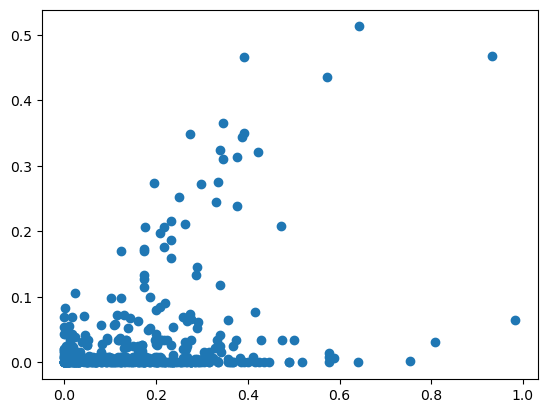

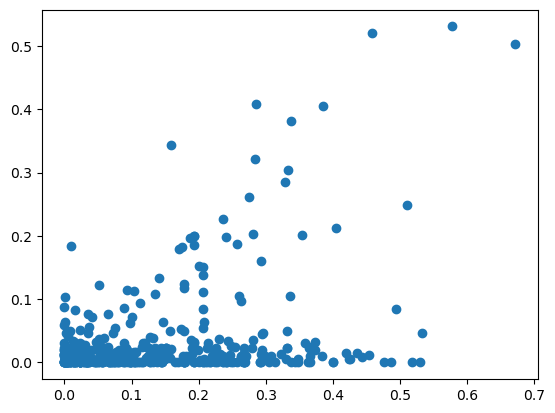

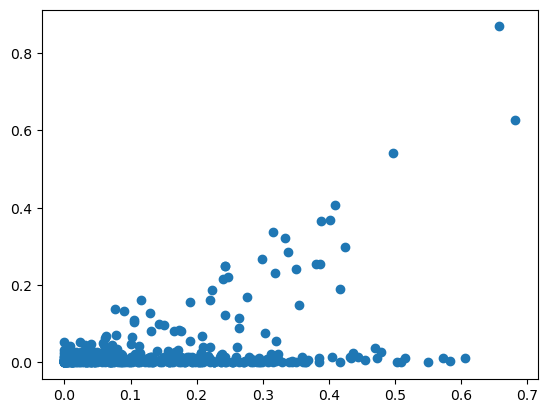

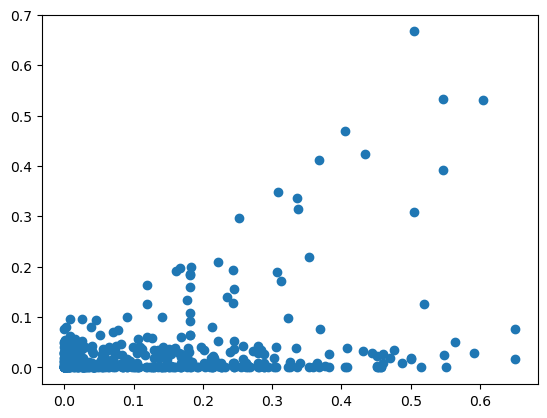

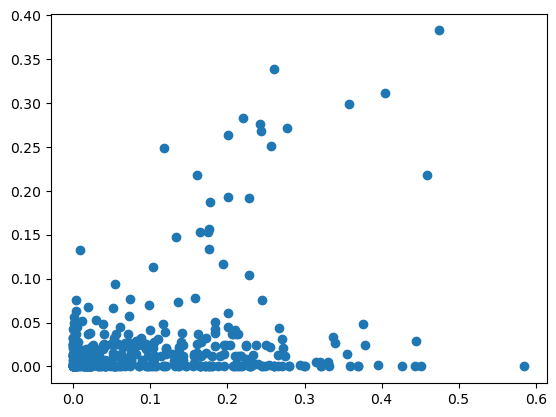

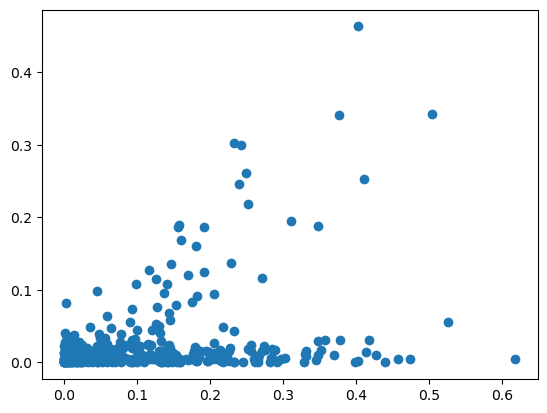

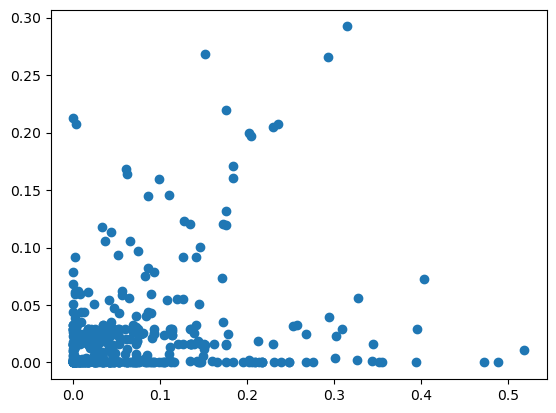

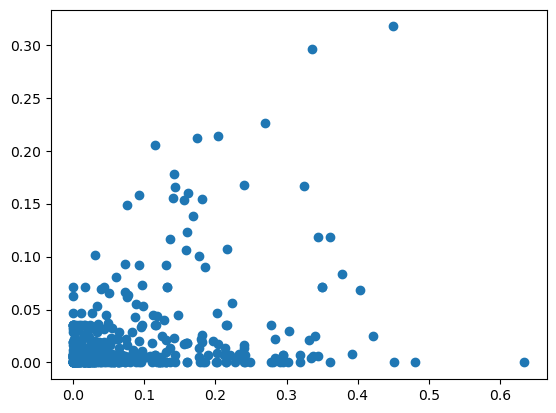

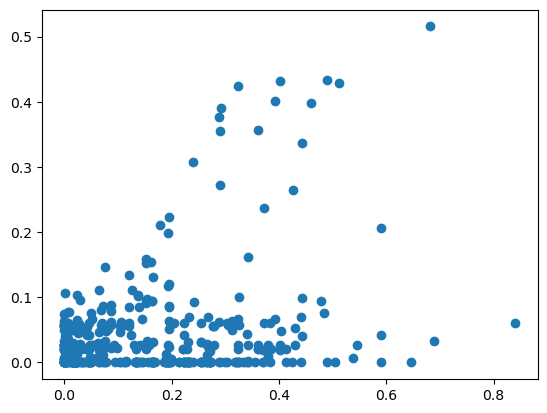

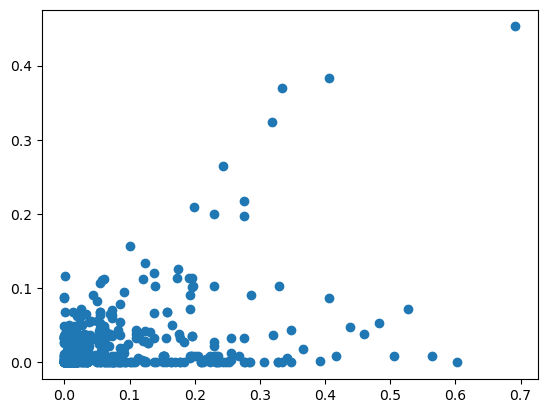

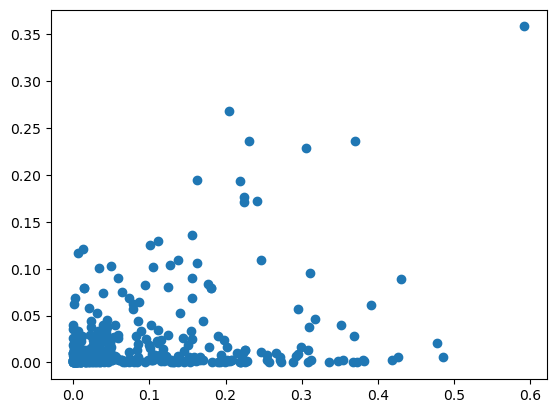

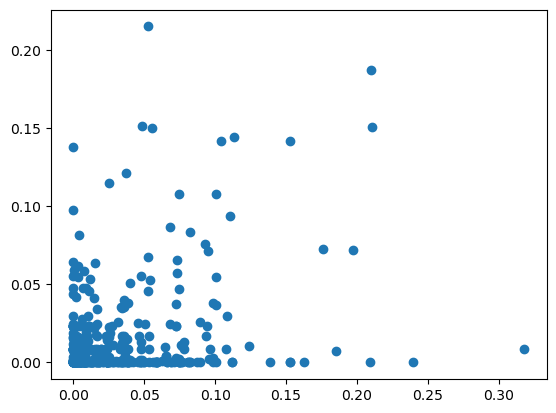

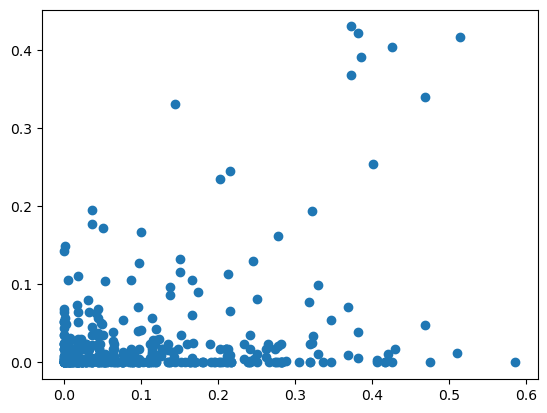

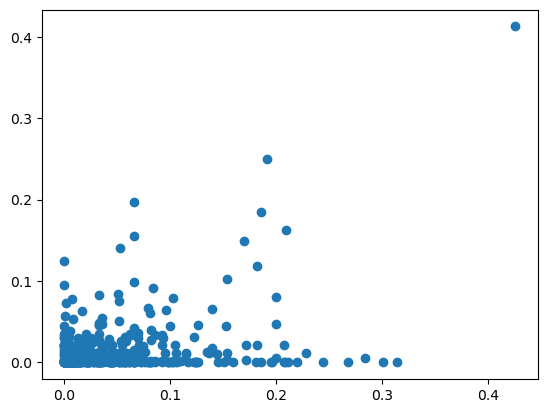

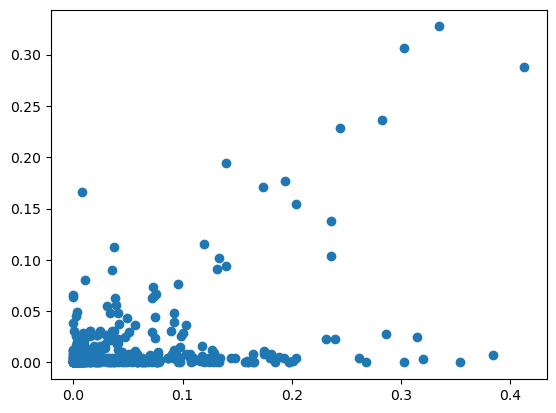

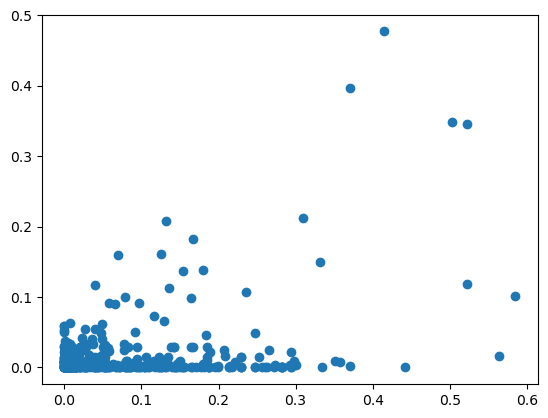

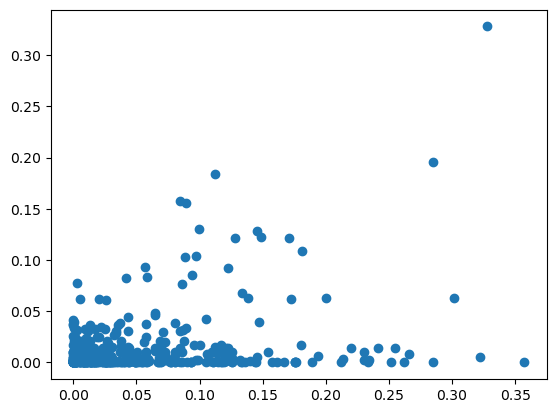

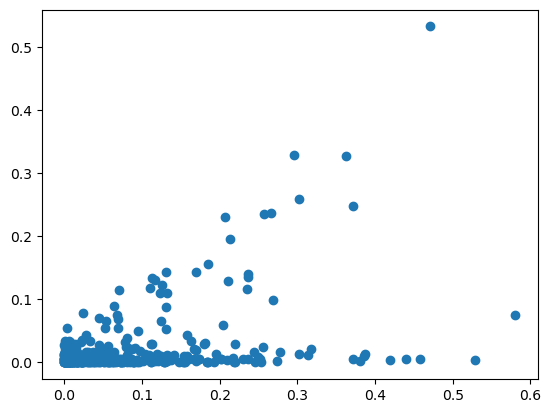

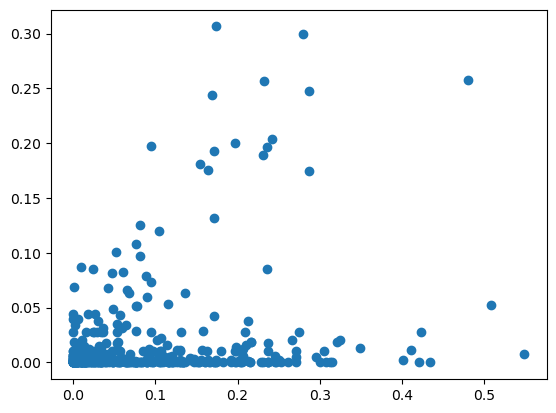

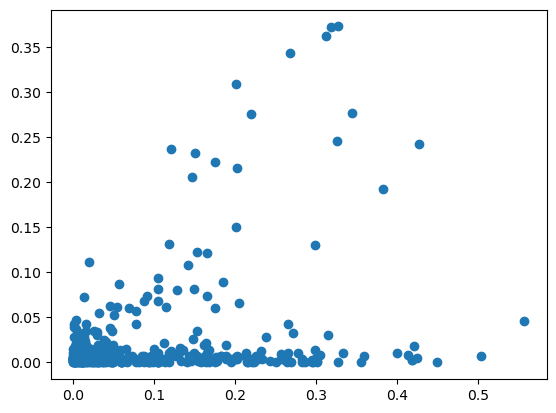

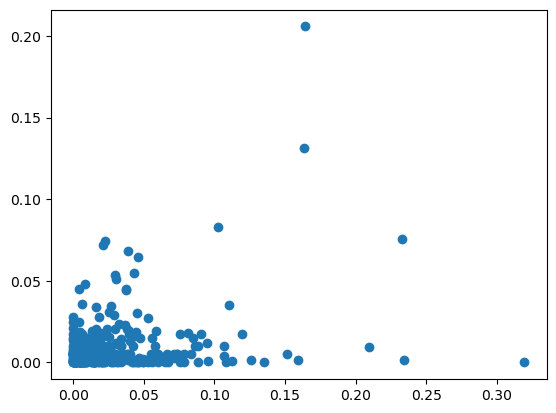

In [29]:
for i in range(21):
    plt.figure()
    plt.scatter(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] )

In [30]:
for i in range(21):
    print(combination_names[i])
    print(stats.pearsonr(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] ))


Africa-America
PearsonRResult(statistic=0.3709562306577219, pvalue=6.4023514839509445e-15)
Africa-CentralAsiaSiberia
PearsonRResult(statistic=0.3634541533413176, pvalue=2.417032058502723e-14)
Africa-EastAsia
PearsonRResult(statistic=0.4219698162425717, pvalue=2.9144150109153067e-19)
Africa-Oceania
PearsonRResult(statistic=0.3554032948111368, pvalue=9.678891034078008e-14)
Africa-SouthAsia
PearsonRResult(statistic=0.2884414369474837, pvalue=2.3516586359385873e-09)
Africa-WestEurasia
PearsonRResult(statistic=0.34357578424505997, pvalue=6.926452533738978e-13)
America-CentralAsiaSiberia
PearsonRResult(statistic=0.20466432113435934, pvalue=2.7759219752530493e-05)
America-EastAsia
PearsonRResult(statistic=0.3001712627469328, pvalue=4.789286783477155e-10)
America-Oceania
PearsonRResult(statistic=0.3163239297882714, pvalue=4.747153659827659e-11)
America-SouthAsia
PearsonRResult(statistic=0.34554509380097415, pvalue=5.0198211150868e-13)
America-WestEurasia
PearsonRResult(statistic=0.317350344867

In [31]:
grch37_to_t2t_all

,Chromosome,Start,End,Original,Strain
0,chr1,156731,156731,chr1:665602-665601,1
1,chr1,156731,156731,chr1:665602-665601,1
2,chr1,385106,385106,chr1:891702-891701,1
3,chr1,502515,502515,chr1:1007802-1007801,1
4,chr1,542636,542636,chr1:1049402-1049401,1
...,...,...,...,...,...
7780,chr22,50867222,50867222,chr22:50797102-50797101,1
7781,chr22,51159529,51159529,chr22:51084002-51084001,1
7782,chr22,51186640,51186640,chr22:51111102-51111101,1
7783,chr22,51201464,51201464,chr22:51126602-51126601,1


In [32]:
t2t_all

,Chromosome,Start,End,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,America-CentralAsiaSiberia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,436980,452948,0.01286,0.00143,0.00291,0.00289,0.00507,0.00014,0.02477,...,0.00833,0.00881,0.01210,0.00053,0.00001,0.00032,0.00392,0.00020,0.00319,0.00583
1,chr1,453948,466894,0.00813,0.00983,0.01291,0.00890,0.01188,0.01560,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,chr1,472779,484339,0.00000,0.00000,0.00000,0.00000,0.00000,0.00520,0.00000,...,0.00000,0.00000,0.00000,0.00392,0.00000,0.00000,0.00551,0.00000,0.00348,0.00496
3,chr1,485339,511499,0.00000,0.00000,0.00000,0.02830,0.00000,0.00000,0.00000,...,0.00000,0.02396,0.00000,0.00000,0.02920,0.00000,0.00000,0.02754,0.03319,0.00000
4,chr1,518975,605035,0.00000,0.00000,0.01072,0.02830,0.00000,0.00520,0.00000,...,0.00845,0.02396,0.00000,0.00392,0.00354,0.01030,0.01815,0.02754,0.02878,0.00496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173246,chr18,76275159,76278412,0.00000,0.02266,0.00000,0.00000,0.00000,0.00520,0.01610,...,0.02347,0.01738,0.02199,0.02556,0.00000,0.00000,0.00551,0.00000,0.00348,0.00496
173247,chr18,76280220,76283528,0.00651,0.01908,0.00274,0.02096,0.01250,0.01350,0.00303,...,0.00741,0.00009,0.00084,0.00033,0.00870,0.00353,0.00446,0.00143,0.00067,0.00007
173248,chr18,76284798,76302290,0.00001,0.00078,0.02613,0.01810,0.02407,0.02058,0.00101,...,0.02347,0.01738,0.02199,0.01278,0.00000,0.00000,0.00183,0.00000,0.00115,0.00164
173249,chr18,76304864,76328399,0.00064,0.00520,0.00445,0.00339,0.00326,0.00092,0.01399,...,0.00009,0.00021,0.02539,0.00131,0.00002,0.02109,0.00101,0.02085,0.00056,0.00737


In [33]:
#### GRCh37 all CNVs to T2T all CNVs 


grch37_to_t2tchm13 = grch37_to_t2t_all.nearest(t2t_all)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 2000]

,Chromosome,Start,End,Original,Strain,Start_b,End_b,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,...,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance
0,chr1,502515,502515,chr1:1007802-1007801,1,485339,511499,0.00978,0.01633,0.00717,...,0.00132,0.06155,0.00573,0.00450,0.04011,0.00127,0.08688,0.01272,0.03757,0
1,chr1,542636,542636,chr1:1049402-1049401,1,518975,605035,0.07067,0.00864,0.03664,...,0.03687,0.00708,0.02735,0.01018,0.03930,0.01047,0.01020,0.00005,0.01068,0
2,chr1,578336,578336,chr1:1085102-1085101,1,518975,605035,0.07067,0.00864,0.03664,...,0.03687,0.00708,0.02735,0.01018,0.03930,0.01047,0.01020,0.00005,0.01068,0
3,chr1,730467,730467,chr1:1234302-1234301,1,700181,782637,0.00813,0.01401,0.01291,...,0.03549,0.04468,0.05085,0.00000,0.00000,0.00551,0.00000,0.00348,0.00496,0
4,chr1,739070,739070,chr1:1242902-1242901,1,700181,782637,0.00813,0.01401,0.01291,...,0.03549,0.04468,0.05085,0.00000,0.00000,0.00551,0.00000,0.00348,0.00496,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7246,chr18,69690163,69690163,chr18:67140802-67140801,1,69681506,69690050,0.03417,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,114
7247,chr18,70586775,70586775,chr18:68038902-68038901,1,70577958,70586447,0.03417,0.00000,0.00000,...,0.00000,0.00000,0.00792,0.00000,0.00000,0.01112,0.00000,0.00704,0.01000,329
7248,chr18,70826299,70826299,chr18:68271802-68271801,1,70817690,70824809,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00792,0.00000,0.00000,0.01112,0.00000,0.00704,0.01000,1491
7250,chr18,73679233,73679233,chr18:71125002-71125001,1,73679650,73726617,0.03417,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,418


In [34]:
## Getting vst values 
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)

grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'] -1 
grch37_to_t2tchm13
#grch37_to_t2tchm13.astype({'Start_old': 'int64'}).dtypes

,Chromosome,Start,End,Original,Strain,Start_b,End_b,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,...,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance,Chromosome_old,coordinates_old,Start_old,End_old
0,chr1,502515,502515,chr1:1007802-1007801,1,485339,511499,0.00978,0.01633,0.00717,...,0.04011,0.00127,0.08688,0.01272,0.03757,0,chr1,1007802-1007801,1007801,1007801
1,chr1,542636,542636,chr1:1049402-1049401,1,518975,605035,0.07067,0.00864,0.03664,...,0.03930,0.01047,0.01020,0.00005,0.01068,0,chr1,1049402-1049401,1049401,1049401
2,chr1,578336,578336,chr1:1085102-1085101,1,518975,605035,0.07067,0.00864,0.03664,...,0.03930,0.01047,0.01020,0.00005,0.01068,0,chr1,1085102-1085101,1085101,1085101
3,chr1,730467,730467,chr1:1234302-1234301,1,700181,782637,0.00813,0.01401,0.01291,...,0.00000,0.00551,0.00000,0.00348,0.00496,0,chr1,1234302-1234301,1234301,1234301
4,chr1,739070,739070,chr1:1242902-1242901,1,700181,782637,0.00813,0.01401,0.01291,...,0.00000,0.00551,0.00000,0.00348,0.00496,0,chr1,1242902-1242901,1242901,1242901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,chr18,79447176,79447176,chr18:76958002-76958001,1,76330170,76357743,0.03952,0.03445,0.01007,...,0.01099,0.02705,0.00452,0.01353,0.00575,3089434,chr18,76958002-76958001,76958001,76958001
7260,chr18,79811270,79811270,chr18:77315502-77315501,1,76330170,76357743,0.03952,0.03445,0.01007,...,0.01099,0.02705,0.00452,0.01353,0.00575,3453528,chr18,77315502-77315501,77315501,77315501
7261,chr18,79812929,79812929,chr18:77317102-77317101,1,76330170,76357743,0.03952,0.03445,0.01007,...,0.01099,0.02705,0.00452,0.01353,0.00575,3455187,chr18,77317102-77317101,77317101,77317101
7262,chr18,79816757,79816757,chr18:77320902-77320901,1,76330170,76357743,0.03952,0.03445,0.01007,...,0.01099,0.02705,0.00452,0.01353,0.00575,3459015,chr18,77320902-77320901,77320901,77320901


In [35]:
vst_grch37 = grch37_to_t2tchm13.merge(grch37_all_values_all_cnvs, left_on=['Start_old','End_old'], right_on=['Start','End'])
vst_grch37 = vst_grch37.drop_duplicates()
vst_grch37

,Chromosome_x,Start_x,End_x,Original,Strain,Start_b,End_b,Africa-America_x,Africa-CentralAsiaSiberia_x,Africa-EastAsia_x,...,CentralAsiaSiberia-EastAsia_y,CentralAsiaSiberia-Oceania_y,CentralAsiaSiberia-SouthAsia_y,CentralAsiaSiberia-WestEurasia_y,EastAsia-Oceania_y,EastAsia-SouthAsia_y,EastAsia-WestEurasia_y,Oceania-SouthAsia_y,Oceania-WestEurasia_y,SouthAsia-WestEurasia_y
0,chr1,502515,502515,chr1:1007802-1007801,1,485339,511499,0.00978,0.01633,0.00717,...,0.01799,0.01206,0.01538,0.01417,0.00125,0.00022,0.00000,0.00047,0.00094,0.00017
1,chr1,542636,542636,chr1:1049402-1049401,1,518975,605035,0.07067,0.00864,0.03664,...,0.00910,0.02667,0.00107,0.00327,0.00362,0.01686,0.00128,0.03915,0.00814,0.00790
2,chr1,578336,578336,chr1:1085102-1085101,1,518975,605035,0.07067,0.00864,0.03664,...,0.00000,0.00000,0.00000,0.00365,0.00000,0.00000,0.00522,0.00000,0.00334,0.00471
3,chr1,730467,730467,chr1:1234302-1234301,1,700181,782637,0.00813,0.01401,0.01291,...,0.00000,0.02250,0.00000,0.00000,0.02778,0.00000,0.00000,0.02621,0.03179,0.00000
4,chr1,739070,739070,chr1:1242902-1242901,1,700181,782637,0.00813,0.01401,0.01291,...,0.00000,0.02250,0.01065,0.00365,0.02778,0.01404,0.00522,0.00197,0.00733,0.00191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398,chr18,79447176,79447176,chr18:76958002-76958001,1,76330170,76357743,0.03952,0.03445,0.01007,...,0.00000,0.00000,0.00000,0.00365,0.00000,0.00000,0.00522,0.00000,0.00334,0.00471
7399,chr18,79811270,79811270,chr18:77315502-77315501,1,76330170,76357743,0.03952,0.03445,0.01007,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7400,chr18,79812929,79812929,chr18:77317102-77317101,1,76330170,76357743,0.03952,0.03445,0.01007,...,0.00000,0.00000,0.00000,0.00365,0.00000,0.00000,0.00522,0.00000,0.00334,0.00471
7401,chr18,79816757,79816757,chr18:77320902-77320901,1,76330170,76357743,0.03952,0.03445,0.01007,...,0.00815,0.00000,0.00000,0.00737,0.00756,0.01009,0.00027,0.00000,0.00676,0.00950


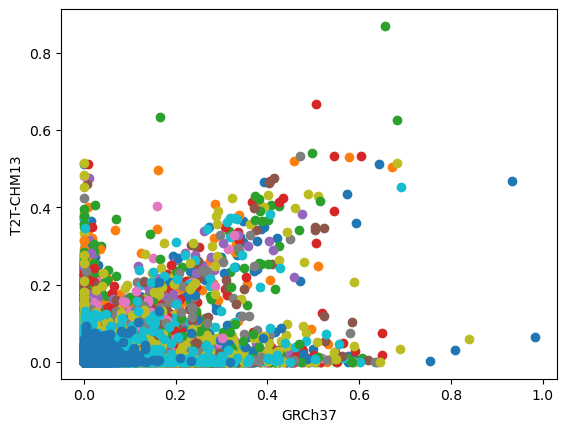

In [36]:
for i in range(21):
    #plt.figure() added for different figures
    plt.scatter(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] )
    plt.xlabel("GRCh37")
    plt.ylabel("T2T-CHM13")

In [37]:
for i in range(21):
    print(combination_names[i])
    print(stats.pearsonr(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] ))
    

Africa-America
PearsonRResult(statistic=0.29703825166403797, pvalue=1.3042408764708127e-148)
Africa-CentralAsiaSiberia
PearsonRResult(statistic=0.25702701910389225, pvalue=1.772354917671651e-110)
Africa-EastAsia
PearsonRResult(statistic=0.33702763314894835, pvalue=2.318816425271264e-193)
Africa-Oceania
PearsonRResult(statistic=0.2808320946105506, pvalue=2.157664027933999e-132)
Africa-SouthAsia
PearsonRResult(statistic=0.22889995874174762, pvalue=2.101190005419306e-87)
Africa-WestEurasia
PearsonRResult(statistic=0.29046633854274695, pvalue=6.633045382821974e-142)
America-CentralAsiaSiberia
PearsonRResult(statistic=0.07883685112591039, pvalue=1.5284802028195602e-11)
America-EastAsia
PearsonRResult(statistic=0.20019265152444526, pvalue=7.045554799634069e-67)
America-Oceania
PearsonRResult(statistic=0.21390060181518028, pvalue=2.6325341562495618e-76)
America-SouthAsia
PearsonRResult(statistic=0.18963617737858776, pvalue=4.4728440993021917e-60)
America-WestEurasia
PearsonRResult(statistic=0

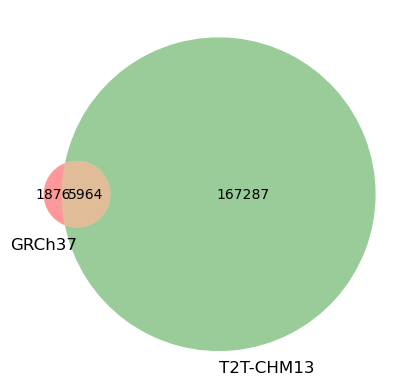

In [39]:
from matplotlib_venn import venn2
## Total T2T-CHM13 173251
## Total GRCh37 7840
## Shared 5964
# Use the venn2 function
venn2(subsets = (1876,167287,5964), set_labels = ('GRCh37', 'T2T-CHM13'))
plt.show()

In [99]:
t2t_all

,Chromosome,Start,End,Type,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,260453,261566,duplication,0.20250,0.00826,0.08376,0.51576,0.00002,0.00647,...,0.04714,0.46687,0.01258,0.02037,0.32429,0.09181,0.11354,0.53687,0.51986,0.00809
1,chr1,261566,263205,duplication,0.24029,0.01503,0.07117,0.55574,0.00274,0.00000,...,0.02009,0.39865,0.00525,0.00772,0.24498,0.04857,0.05455,0.49563,0.39749,0.00133
2,chr1,263205,264505,duplication,0.02285,0.04029,0.05803,0.02651,0.02509,0.00032,...,0.00038,0.00269,0.00282,0.02774,0.00568,0.00630,0.04462,0.00001,0.01531,0.01705
3,chr1,264505,269912,duplication,0.00224,0.00139,0.00142,0.00294,0.00845,0.00018,...,0.00000,0.00000,0.00157,0.00022,0.00000,0.00159,0.00028,0.00333,0.00026,0.00251
4,chr1,269912,271404,duplication,0.01522,0.05149,0.04796,0.00577,0.07768,0.00970,...,0.00047,0.03834,0.00358,0.01881,0.02597,0.00676,0.01678,0.05647,0.00051,0.03922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116019,chr22,51289688,51291273,duplication,0.00456,0.00983,0.00002,0.00890,0.01188,0.01914,...,0.00167,0.00000,0.00000,0.00383,0.00151,0.00204,0.00602,0.00000,0.00340,0.00484
1116020,chr22,51291273,51292827,duplication,0.00456,0.01401,0.00777,0.00890,0.01188,0.00048,...,0.02240,0.03549,0.04468,0.01029,0.00151,0.00204,0.00361,0.00000,0.00067,0.00096
1116021,chr22,51292827,51295018,duplication,0.03417,0.04602,0.00212,0.00000,0.01383,0.00338,...,0.00660,0.03549,0.01258,0.00537,0.00151,0.00006,0.00008,0.01009,0.00226,0.00001
1116022,chr22,51295018,51296018,deletion,0.00000,0.00000,0.01072,0.00000,0.00000,0.00000,...,0.00845,0.00000,0.00000,0.00000,0.00763,0.01030,0.01379,0.00000,0.00000,0.00000


In [79]:
# Using liftover with 0.95 of min map 

T2T = [10759,454]
GRCH37 = [376, 3]
input_chi = pd.DataFrame([T2T, GRCH37])
input_chi.columns = ['T2T_to_GRCh37', 'GRCh37_to_T2T']
input_chi.index = ['Converted', 'No converted']
input_chi

,T2T_to_GRCh37,GRCh37_to_T2T
Converted,10759,454
No converted,376,3


In [80]:
# Using liftover with 0.95 of min map 

T2T = [10791,454]
GRCH37 = [344, 3]
input_chi = pd.DataFrame([T2T, GRCH37])
input_chi.columns = ['T2T_to_GRCh37', 'GRCh37_to_T2T']
input_chi.index = ['Converted', 'No converted']
input_chi

,T2T_to_GRCh37,GRCh37_to_T2T
Converted,10791,454
No converted,344,3


In [81]:
stats.chi2_contingency(input_chi)

Chi2ContingencyResult(statistic=8.12977555785711, pvalue=0.0043544137146147984, dof=1, expected_freq=array([[10801.68003796,   443.31996204],
       [  333.31996204,    13.68003796]]))

In [82]:
#### GRCh37 to T2T
#t2t.overlap(grch37_to_t2t)
grch37_to_t2tchm13 = grch37_to_t2t_all.nearest(t2t)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
grch37_to_t2tchm13.sort_values(by='Distance').head(275)

,Chromosome,Start,End,Original,Strain,Start_b,End_b,Type,Distance
0,chr1,385106,385106,chr1:891702-891701,1,385084,387761,duplication,0
4965,chr10,104419465,104419465,chr10:105291902-105291901,1,104405478,104428360,deletion,0
4964,chr10,104045086,104045086,chr10:104918602-104918601,1,104041123,104053717,deletion,0
4963,chr10,103049024,103049024,chr10:103923802-103923801,1,103048190,103053290,duplication,0
4962,chr10,102795847,102795847,chr10:103670602-103670601,1,102792850,102799988,deletion,0
...,...,...,...,...,...,...,...,...,...
4669,chr9,124346678,124346678,chr9:114937802-114937801,1,124346052,124347147,deletion,0
4668,chr9,123860978,123860978,chr9:114451902-114451901,1,123859309,123862739,deletion,0
4667,chr9,122859908,122859908,chr9:113452202-113452201,1,122856695,122862982,deletion,0
4666,chr9,122592416,122592416,chr9:113185102-113185101,1,122585236,122595434,duplication,0


In [83]:
grch37_to_t2tchm13 = t2t.nearest(grch37_to_t2t_all)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
grch37_to_t2tchm13.sort_values(by='Distance').head(336)

,Chromosome,Start,End,Type,Start_b,End_b,Original,Strain,Distance
0,chr1,385084,387761,duplication,385106,385106,chr1:891702-891701,1,0
1040770,chr20,58205549,58207892,deletion,58207336,58207336,chr20:55004902-55004901,1,0
1040771,chr20,58813157,58818962,deletion,58817253,58817253,chr20:55614402-55614401,1,0
1040772,chr20,59848578,59849578,deletion,59849556,59849556,chr20:56645402-56645401,1,0
1040773,chr20,59848578,59849578,duplication,59849556,59849556,chr20:56645402-56645401,1,0
...,...,...,...,...,...,...,...,...,...
82273,chr2,155300365,155303159,deletion,155301707,155301707,chr2:155705202-155705201,1,0
82274,chr2,155319899,155328669,duplication,155323413,155323413,chr2:155726902-155726901,1,0
82275,chr2,155332520,155344350,deletion,155339213,155339213,chr2:155742702-155742701,1,0
82294,chr2,163656837,163659351,deletion,163658204,163658204,chr2:164057402-164057401,1,0


In [84]:
grch37_to_t2tchm13 = t2t_all.nearest(grch37_to_t2t_all)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 2000]

,Chromosome,Start,End,Type,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,...,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Start_b,End_b,Original,Strain,Distance
0,chr1,385084,387761,duplication,0.06949,0.29305,0.08073,0.02830,0.10490,0.04928,...,0.00145,0.00187,0.04083,0.01295,0.00638,385106,385106,chr1:891702-891701,1,0
1,chr1,502101,503101,deletion,0.00813,0.00134,0.01291,0.00890,0.01188,0.01568,...,0.00000,0.00000,0.00000,0.00000,0.00000,502515,502515,chr1:1007802-1007801,1,0
2,chr1,540598,544980,deletion,0.06195,0.00624,0.05204,0.04041,0.00420,0.02607,...,0.02701,0.00367,0.02013,0.00151,0.00961,542636,542636,chr1:1049402-1049401,1,0
3,chr1,576150,578407,deletion,0.00813,0.00134,0.00298,0.00277,0.02754,0.01568,...,0.01369,0.02783,0.01192,0.03330,0.07150,578336,578336,chr1:1085102-1085101,1,0
4,chr1,729845,731135,deletion,0.01654,0.01996,0.02613,0.01810,0.00008,0.00028,...,0.02924,0.01645,0.02052,0.01042,0.00063,730467,730467,chr1:1234302-1234301,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115960,chr22,51202141,51208869,deletion,0.00000,0.00000,0.01072,0.00000,0.01383,0.00000,...,0.00138,0.01379,0.01009,0.00000,0.01738,51201464,51201464,chr22:51126602-51126601,1,678
1115995,chr22,51242213,51243861,deletion,0.01654,0.01996,0.00007,0.00014,0.00008,0.00028,...,0.00024,0.00003,0.00042,0.00001,0.00063,51245253,51245253,chr22:51170102-51170101,1,1393
1115996,chr22,51245263,51246263,deletion,0.00000,0.00000,0.01072,0.00000,0.00000,0.01026,...,0.01030,0.00131,0.00000,0.00687,0.00977,51245253,51245253,chr22:51170102-51170101,1,11
1115997,chr22,51245263,51246263,duplication,0.00000,0.00000,0.02169,0.00000,0.00000,0.00508,...,0.02085,0.00885,0.00000,0.00340,0.00484,51245253,51245253,chr22:51170102-51170101,1,11


<h1> Confusion matrix
<h4>Confusion matrix of litfovers (True positives and True Negatives; both assemblies, False positive to T2TCHM13, False negative to T2TCHM13)
 


In [44]:
header_1 = ['Chromosome','Start', 'End', 'Original','Strain']
header_2 = ['Chromosome', 'Start' , 'End']
header_3 = ['Chromosome', 'Start' , 'End', 'Type']

grch37_to_t2t = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
grch37_to_t2t = PyRanges(grch37_to_t2t)

grch37_to_t2t_all = pd.read_csv('/Users/luciabazan/Downloads/liftover_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
grch37_to_t2t_all = PyRanges(grch37_to_t2t_all)

t2t_to_grch37 = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_t2tchm13_to_grch37.bed', sep='\t', names=header_1)
t2t_to_grch37 = PyRanges(t2t_to_grch37)

grch37 = pd.read_csv('vst_coordinates_grch37.bed', sep=',', names=header_2)
grch37 = PyRanges(grch37)

t2t = pd.read_csv('vst_coordinates_chm13t2t.bed', sep='\t', names=header_3)
t2t = PyRanges(t2t)

t2t_all= pd.read_csv('cnvs_coordinates_chm13t2t.bed', sep='\t', names=header_3)
t2t_all = PyRanges(t2t_all)
t2t_all

t2t_all_values= pd.read_csv('../data/vst_results_t2tchm13.csv')
#t2t_all_values = PyRanges(t2t_all_values)


grch37_all_values= pd.read_csv('../data/vst_results_grch37.csv')
#grch37_all_values = PyRanges(grch37_all_values)
grch37_all_values

,Chromosome,Start,End,Type,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,176101,176101,deletion,0.00113,0.00296,0.01980,0.04847,0.00462,0.00031,...,0.03052,0.05891,0.01228,0.00365,0.01144,0.00441,0.01162,0.02469,0.03157,0.00185
1,chr1,449901,449901,deletion,0.00000,0.00000,0.01075,0.02736,0.02786,0.00508,...,0.00815,0.02250,0.02163,0.00365,0.00322,0.00636,0.00098,0.00048,0.00733,0.01248
2,chr1,665601,665601,deletion,0.00047,0.04104,0.00301,0.00687,0.00005,0.00067,...,0.06225,0.10623,0.05403,0.04467,0.00078,0.00252,0.00092,0.00684,0.00302,0.00038
3,chr1,665601,665601,duplication,-0.00000,0.01779,0.00002,0.00008,0.02189,0.02900,...,0.01653,0.02250,0.00000,0.00000,0.00002,0.02043,0.02727,0.02621,0.03179,0.00000
4,chr1,891701,891701,deletion,0.00164,0.00012,0.00004,0.00077,0.03324,0.00084,...,0.00029,0.00030,0.04514,0.00140,0.00111,0.03102,0.00054,0.05328,0.00276,0.01934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,chr9,140136301,140136301,deletion,0.01402,0.00007,0.02165,0.00041,0.03190,0.00900,...,0.01586,0.00014,0.02431,0.00589,0.01292,0.00091,0.00216,0.02050,0.00433,0.00571
7836,chr9,140197201,140197201,deletion,0.00769,0.00877,0.00001,0.00814,0.01081,0.01437,...,0.00815,0.00000,0.00000,0.00000,0.00756,0.01009,0.01352,0.00000,0.00000,0.00000
7837,chr9,140245301,140245301,deletion,0.15589,0.12055,0.28916,0.16862,0.20593,0.17624,...,0.05315,0.01008,0.01293,0.00205,0.01708,0.01357,0.02560,0.00013,0.00197,0.00365
7838,chr9,140387601,140387601,deletion,0.00062,0.02499,0.03329,0.02323,0.03069,0.01955,...,0.00000,0.00000,0.00000,0.00737,0.00000,0.00000,0.01054,0.00000,0.00676,0.00950


In [45]:
#### GRCh37 vst to T2T vst 
#t2t.overlap(grch37_to_t2t)
grch37_to_t2tchm13 = grch37_to_t2t.nearest(t2t)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()


#grch37_to_t2tchm13 = grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 2000]
grch37_to_t2tchm13.sort_values(by=['Distance']).head(50)

,Chromosome,Start,End,Original,Strain,Start_b,End_b,Type,Distance
0,chr1,7831877,7831877,chr1:8360202-8360201,1,7831825,7834151,deletion,0
296,chr11,58812122,58812122,chr11:58630102-58630101,1,58808161,58815232,duplication,0
295,chr11,55536082,55536082,chr11:55365302-55365301,1,55527643,55538953,deletion,0
294,chr11,47188221,47188221,chr11:47052902-47052901,1,47185645,47189271,deletion,0
293,chr11,31503591,31503591,chr11:31389302-31389301,1,31501452,31504577,duplication,0
292,chr11,29116310,29116310,chr11:28997202-28997201,1,29109394,29120621,deletion,0
291,chr11,26724595,26724595,chr11:26605502-26605501,1,26723626,26724626,duplication,0
290,chr11,26578443,26578443,chr11:26459102-26459101,1,26571793,26582617,deletion,0
289,chr11,25869396,25869396,chr11:25750502-25750501,1,25856649,25872120,deletion,0
288,chr11,24347508,24347508,chr11:24244802-24244801,1,24335743,24350825,deletion,0


In [46]:
## Getting vst values 
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)

grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
#grch37_to_t2tchm13.astype({'Start_old': 'int64'}).dtypes

In [47]:
vst_grch37 = grch37_to_t2tchm13.merge(grch37_all_values, left_on='End_old', right_on='End')
vst_t2t = grch37_to_t2tchm13.merge(t2t_all_values, left_on=['Chromosome','Start_b','End_b'], right_on=['Chromosome','Start','End'])
vst_t2t

,Chromosome,Start_x,End_x,Original,Strain,Start_b,End_b,Type_x,Distance,Chromosome_old,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,7831877,7831877,chr1:8360202-8360201,1,7831825,7834151,deletion,0,chr1,...,0.20833,0.16226,0.19753,0.23443,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,chr1,9328929,9328929,chr1:9846202-9846201,1,9327347,9329877,deletion,0,chr1,...,-0.00000,0.01544,0.00997,0.02872,0.01273,0.01072,0.02922,0.04083,0.00148,0.07366
2,chr1,15268652,15268652,chr1:16150402-16150401,1,15262571,15273032,deletion,0,chr1,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,chr1,23888826,23888826,chr1:24377602-24377601,1,23884149,23889404,deletion,0,chr1,...,0.07500,0.06592,0.00668,0.01458,0.00000,0.03668,0.01803,0.03027,0.01295,0.00208
4,chr1,61526516,61526516,chr1:62113302-62113301,1,61525294,61528369,deletion,0,chr1,...,0.01987,0.00161,0.04440,0.00331,0.03219,0.00487,0.00562,0.06277,0.00850,0.01731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,chr22,39367662,39367662,chr22:39293302-39293301,1,39360647,39368645,deletion,0,chr22,...,0.00845,0.00000,0.01110,0.00000,0.00763,0.00138,0.01379,0.01009,0.00000,0.01738
535,chr22,45005436,45005436,chr22:44917502-44917501,1,45002433,45008343,deletion,0,chr22,...,0.01135,0.00877,0.00836,0.00521,0.00091,0.00097,0.00164,0.00000,0.00005,0.00009
536,chr22,45643209,45643209,chr22:45554602-45554601,1,45642081,45644771,deletion,0,chr22,...,0.06308,0.05437,0.00094,0.04836,0.13517,0.05844,0.19557,0.05404,0.00340,0.06073
537,chr22,49638819,49638819,chr22:49530202-49530201,1,49637546,49639487,deletion,0,chr22,...,0.00845,0.00000,0.00000,0.00000,0.00763,0.01030,0.01379,0.00000,0.00000,0.00000
